In [2]:
import os
import sys
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler


In [3]:
# stop warnings
import warnings 
warnings.filterwarnings('ignore')

In [4]:
sys.path.append('../scripts')

In [8]:
# Load the dataset
df = pd.read_csv('../data/feature_data.csv')

In [9]:
df

,CustomerId,Recency,Frequency,Monetary,MeanAmount,StdAmount,AvgTransactionHour,AvgTransactionDay,AvgTransactionMonth,AvgTransactionYear,...,AvgTransactionMonth_binned_WoE,AvgTransactionYear_binned_WoE,TotalDebits_binned_WoE,TotalCredits_binned_WoE,DebitCount_binned_WoE,CreditCount_binned_WoE,TransactionVolatility_binned_WoE,MonetaryAmount_binned_WoE,NetCashFlow_binned_WoE,DebitCreditRatio_binned_WoE
0,0,0,5,20000.0,4000.000000,6558.963333,7.800000,16.000000,11.000000,2018.000000,...,0.485419,0.153039,0.885726,0.788475,0.097926,0.077498,1.411927,1.043871,0.848572,0.331167
1,1,63,11,4225.0,384.090909,560.498966,13.454545,14.727273,8.636364,2018.272727,...,0.485419,0.153039,-1.314731,-0.245335,0.278747,-0.331822,-0.756022,-1.314731,-1.230044,1.370248
2,2,0,6,20000.0,3333.333333,6030.478146,14.333333,1.000000,2.000000,2019.000000,...,-0.295459,-0.463634,0.885726,0.788475,0.278747,0.077498,-0.265469,1.043871,0.848572,0.331167
3,3,0,9,48800.0,5422.222222,5983.681513,10.111111,28.000000,12.000000,2018.000000,...,-0.138449,0.153039,0.765032,0.264165,0.278747,0.362420,-0.265469,0.609240,0.495445,-0.952987
4,4,12,7,26335.0,3762.142857,4971.798817,11.428571,15.571429,8.857143,2018.285714,...,0.485419,0.153039,0.885726,-0.507697,0.278747,0.362420,-0.265469,1.043871,0.495445,1.370248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2636,2636,0,6,20000.0,3333.333333,6088.240030,10.000000,8.000000,2.000000,2019.000000,...,-0.295459,-0.463634,0.885726,0.788475,0.278747,0.077498,-0.265469,1.043871,0.848572,0.331167
2637,2637,0,5,20000.0,4000.000000,6745.368782,15.000000,18.000000,1.000000,2019.000000,...,-0.627121,-0.463634,0.885726,0.788475,0.097926,0.077498,1.411927,1.043871,0.848572,0.331167
2638,2638,88,101,543873.0,5384.881188,14800.656784,13.900990,18.475248,5.207921,2018.623762,...,0.776712,0.774511,0.336622,-0.132277,0.102909,0.217838,0.685424,0.309954,0.321874,1.370248
2639,2639,0,17,139000.0,8176.470588,4433.329648,14.470588,7.000000,12.000000,2018.000000,...,-0.138449,0.153039,-0.317438,0.788475,-0.116858,0.077498,-0.265469,-0.284426,0.321874,1.370248


In [10]:
print(df.columns)

Index(['CustomerId', 'Recency', 'Frequency', 'Monetary', 'MeanAmount',
       'StdAmount', 'AvgTransactionHour', 'AvgTransactionDay',
       'AvgTransactionMonth', 'AvgTransactionYear', 'TotalDebits',
       'TotalCredits', 'DebitCount', 'CreditCount', 'TransactionVolatility',
       'MonetaryAmount', 'NetCashFlow', 'DebitCreditRatio', 'Label', 'Risk',
       'Recency_binned_WoE', 'Frequency_binned_WoE', 'Monetary_binned_WoE',
       'MeanAmount_binned_WoE', 'StdAmount_binned_WoE',
       'AvgTransactionHour_binned_WoE', 'AvgTransactionDay_binned_WoE',
       'AvgTransactionMonth_binned_WoE', 'AvgTransactionYear_binned_WoE',
       'TotalDebits_binned_WoE', 'TotalCredits_binned_WoE',
       'DebitCount_binned_WoE', 'CreditCount_binned_WoE',
       'TransactionVolatility_binned_WoE', 'MonetaryAmount_binned_WoE',
       'NetCashFlow_binned_WoE', 'DebitCreditRatio_binned_WoE'],
      dtype='object')


In [11]:
# Define the features (X) and target (y)
X = df.drop(['Risk', 'Label'], axis=1)
y = df['Risk']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Random Forest Model

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Initialize the models
logreg = LogisticRegression()
rf = RandomForestClassifier(random_state=42)


In [21]:
# Train Logistic Regression model
logreg.fit(X_train, y_train)

# Train Random Forest model
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### Hyperparameter Tuning

In [22]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

# Initialize Grid Search
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform Grid Search to find the best parameters
grid_search_rf.fit(X_train, y_train)

# Best parameters found by Grid Search
best_rf = grid_search_rf.best_estimator_


In [ ]:
# # Perform hyperparameter tuning using Randomized Search
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [5, 10, 15],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 5, 10]
# }
# randomized_search = RandomizedSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1_macro', n_iter=10)
# randomized_search.fit(X_train_scaled, y_train)
# print("Best parameters:", randomized_search.best_params_)

### Model Evaluation and Prediction

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Logistic Regression predictions
y_pred_logreg = logreg.predict(X_test)


In [25]:
# Random Forest predictions
y_pred_rf = best_rf.predict(X_test)

In [26]:
# Accuracy
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

In [27]:
# Precision
precision_logreg = precision_score(y_test, y_pred_logreg)
precision_rf = precision_score(y_test, y_pred_rf)

In [28]:
# Recall
recall_logreg = recall_score(y_test, y_pred_logreg)
recall_rf = recall_score(y_test, y_pred_rf)


In [29]:
# F1 Score
f1_logreg = f1_score(y_test, y_pred_logreg)
f1_rf = f1_score(y_test, y_pred_rf)

In [30]:
# ROC-AUC Score
roc_auc_logreg = roc_auc_score(y_test, y_pred_logreg)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

In [31]:
# Print the results
print(f"Logistic Regression - Accuracy: {accuracy_logreg}, Precision: {precision_logreg}, Recall: {recall_logreg}, F1 Score: {f1_logreg}, ROC-AUC: {roc_auc_logreg}")
print(f"Random Forest - Accuracy: {accuracy_rf}, Precision: {precision_rf}, Recall: {recall_rf}, F1 Score: {f1_rf}, ROC-AUC: {roc_auc_rf}")

Logistic Regression - Accuracy: 0.6294896030245747, Precision: 0.6294896030245747, Recall: 1.0, F1 Score: 0.7726218097447796, ROC-AUC: 0.5
Random Forest - Accuracy: 0.996219281663516, Precision: 0.996996996996997, Recall: 0.996996996996997, F1 Score: 0.996996996996997, ROC-AUC: 0.9959474780903353


### ROC-AUC curve

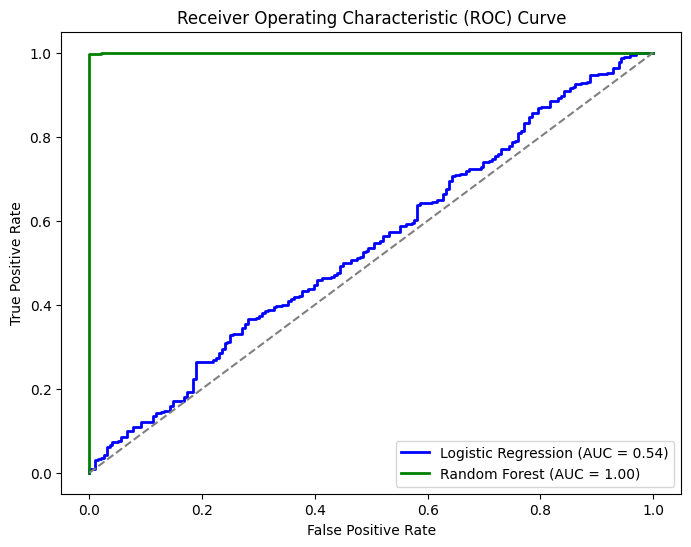

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities for Logistic Regression and Random Forest
y_pred_prob_logreg = logreg.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
y_pred_prob_rf = best_rf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for Logistic Regression
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_prob_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# Compute ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC-AUC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# Plot diagonal line for random predictions
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Add plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show the plot
plt.show()


In [33]:
from sklearn.metrics import classification_report

# Predictions for Logistic Regression
y_pred_logreg = logreg.predict(X_test)

# Predictions for Random Forest
y_pred_rf = best_rf.predict(X_test)

# Print classification report for Logistic Regression
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

# Print classification report for Random Forest
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       196
           1       0.63      1.00      0.77       333

    accuracy                           0.63       529
   macro avg       0.31      0.50      0.39       529
weighted avg       0.40      0.63      0.49       529


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       196
           1       1.00      1.00      1.00       333

    accuracy                           1.00       529
   macro avg       1.00      1.00      1.00       529
weighted avg       1.00      1.00      1.00       529



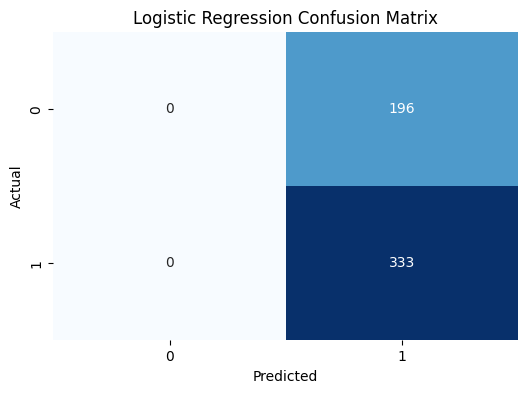

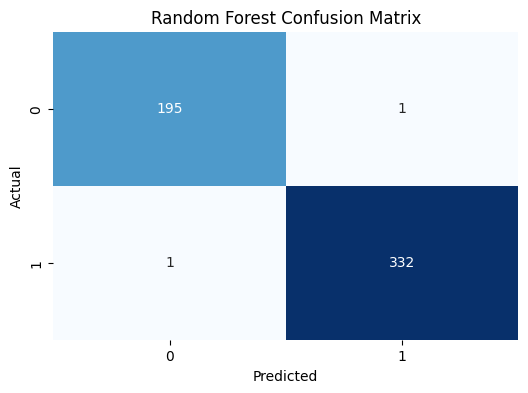

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix for Logistic Regression
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Plot confusion matrix for Logistic Regression
plot_confusion_matrix(cm_logreg, "Logistic Regression Confusion Matrix")

# Plot confusion matrix for Random Forest
plot_confusion_matrix(cm_rf, "Random Forest Confusion Matrix")


In [39]:
# Example for Logistic Regression
from sklearn.linear_model import LogisticRegression

# Define your features and target
X_train = df.drop('Risk', axis=1)  # Features
y_train = df['Risk']  # Target variable

# Fit the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Example for Random Forest
from sklearn.ensemble import RandomForestClassifier

# Fit the model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

In [40]:
print(X_train.columns.tolist())


['CustomerId', 'Recency', 'Frequency', 'Monetary', 'MeanAmount', 'StdAmount', 'AvgTransactionHour', 'AvgTransactionDay', 'AvgTransactionMonth', 'AvgTransactionYear', 'TotalDebits', 'TotalCredits', 'DebitCount', 'CreditCount', 'TransactionVolatility', 'MonetaryAmount', 'NetCashFlow', 'DebitCreditRatio', 'Label', 'Recency_binned_WoE', 'Frequency_binned_WoE', 'Monetary_binned_WoE', 'MeanAmount_binned_WoE', 'StdAmount_binned_WoE', 'AvgTransactionHour_binned_WoE', 'AvgTransactionDay_binned_WoE', 'AvgTransactionMonth_binned_WoE', 'AvgTransactionYear_binned_WoE', 'TotalDebits_binned_WoE', 'TotalCredits_binned_WoE', 'DebitCount_binned_WoE', 'CreditCount_binned_WoE', 'TransactionVolatility_binned_WoE', 'MonetaryAmount_binned_WoE', 'NetCashFlow_binned_WoE', 'DebitCreditRatio_binned_WoE']


In [41]:
# Create df_prob with only the features used in training
feature_columns = X_train.columns.tolist()  # This contains the feature names used during training

df_prob = df[feature_columns]  # Ensure df_prob only contains the relevant features


In [42]:
print("Shape of df_prob:", df_prob.shape)
print("Columns in df_prob:", df_prob.columns.tolist())


Shape of df_prob: (2641, 36)
Columns in df_prob: ['CustomerId', 'Recency', 'Frequency', 'Monetary', 'MeanAmount', 'StdAmount', 'AvgTransactionHour', 'AvgTransactionDay', 'AvgTransactionMonth', 'AvgTransactionYear', 'TotalDebits', 'TotalCredits', 'DebitCount', 'CreditCount', 'TransactionVolatility', 'MonetaryAmount', 'NetCashFlow', 'DebitCreditRatio', 'Label', 'Recency_binned_WoE', 'Frequency_binned_WoE', 'Monetary_binned_WoE', 'MeanAmount_binned_WoE', 'StdAmount_binned_WoE', 'AvgTransactionHour_binned_WoE', 'AvgTransactionDay_binned_WoE', 'AvgTransactionMonth_binned_WoE', 'AvgTransactionYear_binned_WoE', 'TotalDebits_binned_WoE', 'TotalCredits_binned_WoE', 'DebitCount_binned_WoE', 'CreditCount_binned_WoE', 'TransactionVolatility_binned_WoE', 'MonetaryAmount_binned_WoE', 'NetCashFlow_binned_WoE', 'DebitCreditRatio_binned_WoE']


In [44]:
# Predict probabilities for risk using the logistic regression model
df['logreg_risk_probability'] = logreg.predict_proba(df_prob)[:, 1]
df['logreg_risk_probability']

# Predict probabilities for risk using the random forest model
df['rf_risk_probability'] = rf.predict_proba(df_prob)[:, 1]
df['rf_risk_probability']


0       1.00
1       1.00
2       1.00
3       1.00
4       0.99
        ... 
2636    1.00
2637    1.00
2638    1.00
2639    0.00
2640    0.00
Name: rf_risk_probability, Length: 2641, dtype: float64

In [45]:
# Predict probabilities for risk using the logistic regression model
df['logreg_risk_probability'] = logreg.predict_proba(df_prob)[:, 1]
df['logreg_risk_probability']

0       0.652131
1       0.633545
2       0.650782
3       0.659047
4       0.645696
          ...   
2636    0.617451
2637    0.620137
2638    0.656866
2639    0.634930
2640    0.662976
Name: logreg_risk_probability, Length: 2641, dtype: float64

In [60]:
df

,CustomerId,Recency,Frequency,Monetary,MeanAmount,StdAmount,AvgTransactionHour,AvgTransactionDay,AvgTransactionMonth,AvgTransactionYear,...,TotalDebits_binned_WoE,TotalCredits_binned_WoE,DebitCount_binned_WoE,CreditCount_binned_WoE,TransactionVolatility_binned_WoE,MonetaryAmount_binned_WoE,NetCashFlow_binned_WoE,DebitCreditRatio_binned_WoE,logreg_risk_probability,rf_risk_probability
0,0,0,5,20000.0,4000.000000,6558.963333,7.800000,16.000000,11.000000,2018.000000,...,0.885726,0.788475,0.097926,0.077498,1.411927,1.043871,0.848572,0.331167,0.652131,1.00
1,1,63,11,4225.0,384.090909,560.498966,13.454545,14.727273,8.636364,2018.272727,...,-1.314731,-0.245335,0.278747,-0.331822,-0.756022,-1.314731,-1.230044,1.370248,0.633545,1.00
2,2,0,6,20000.0,3333.333333,6030.478146,14.333333,1.000000,2.000000,2019.000000,...,0.885726,0.788475,0.278747,0.077498,-0.265469,1.043871,0.848572,0.331167,0.650782,1.00
3,3,0,9,48800.0,5422.222222,5983.681513,10.111111,28.000000,12.000000,2018.000000,...,0.765032,0.264165,0.278747,0.362420,-0.265469,0.609240,0.495445,-0.952987,0.659047,1.00
4,4,12,7,26335.0,3762.142857,4971.798817,11.428571,15.571429,8.857143,2018.285714,...,0.885726,-0.507697,0.278747,0.362420,-0.265469,1.043871,0.495445,1.370248,0.645696,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2636,2636,0,6,20000.0,3333.333333,6088.240030,10.000000,8.000000,2.000000,2019.000000,...,0.885726,0.788475,0.278747,0.077498,-0.265469,1.043871,0.848572,0.331167,0.617451,1.00
2637,2637,0,5,20000.0,4000.000000,6745.368782,15.000000,18.000000,1.000000,2019.000000,...,0.885726,0.788475,0.097926,0.077498,1.411927,1.043871,0.848572,0.331167,0.620137,1.00
2638,2638,88,101,543873.0,5384.881188,14800.656784,13.900990,18.475248,5.207921,2018.623762,...,0.336622,-0.132277,0.102909,0.217838,0.685424,0.309954,0.321874,1.370248,0.656866,1.00
2639,2639,0,17,139000.0,8176.470588,4433.329648,14.470588,7.000000,12.000000,2018.000000,...,-0.317438,0.788475,-0.116858,0.077498,-0.265469,-0.284426,0.321874,1.370248,0.634930,0.00


In [49]:
# Check if specific columns exist in the DataFrame
columns_to_check = ['logreg_risk_probability', 'rf_risk_probability', 'Risk']
missing_columns = [col for col in columns_to_check if col not in df.columns]

if missing_columns:
    print(f"The following columns are missing: {missing_columns}")
else:
    print("The columns are present.")


The columns are present.


In [50]:
# Select and display only the specified columns from the DataFrame
selected_columns = ['logreg_risk_probability', 'rf_risk_probability', 'Risk']

# Check if all selected columns are present in the DataFrame
missing_columns = [col for col in selected_columns if col not in df.columns]

if missing_columns:
    print(f"The following columns are missing: {missing_columns}")
else:
    # Display the specified columns
    print(df[selected_columns])


      logreg_risk_probability  rf_risk_probability  Risk
0                    0.652131                 1.00     1
1                    0.633545                 1.00     1
2                    0.650782                 1.00     1
3                    0.659047                 1.00     1
4                    0.645696                 0.99     1
...                       ...                  ...   ...
2636                 0.617451                 1.00     1
2637                 0.620137                 1.00     1
2638                 0.656866                 1.00     1
2639                 0.634930                 0.00     0
2640                 0.662976                 0.00     0

[2641 rows x 3 columns]


In [59]:
# Check the columns in df_prob
print(df.columns)


Index(['CustomerId', 'Recency', 'Frequency', 'Monetary', 'MeanAmount',
       'StdAmount', 'AvgTransactionHour', 'AvgTransactionDay',
       'AvgTransactionMonth', 'AvgTransactionYear', 'TotalDebits',
       'TotalCredits', 'DebitCount', 'CreditCount', 'TransactionVolatility',
       'MonetaryAmount', 'NetCashFlow', 'DebitCreditRatio', 'Label', 'Risk',
       'Recency_binned_WoE', 'Frequency_binned_WoE', 'Monetary_binned_WoE',
       'MeanAmount_binned_WoE', 'StdAmount_binned_WoE',
       'AvgTransactionHour_binned_WoE', 'AvgTransactionDay_binned_WoE',
       'AvgTransactionMonth_binned_WoE', 'AvgTransactionYear_binned_WoE',
       'TotalDebits_binned_WoE', 'TotalCredits_binned_WoE',
       'DebitCount_binned_WoE', 'CreditCount_binned_WoE',
       'TransactionVolatility_binned_WoE', 'MonetaryAmount_binned_WoE',
       'NetCashFlow_binned_WoE', 'DebitCreditRatio_binned_WoE',
       'logreg_risk_probability', 'rf_risk_probability'],
      dtype='object')


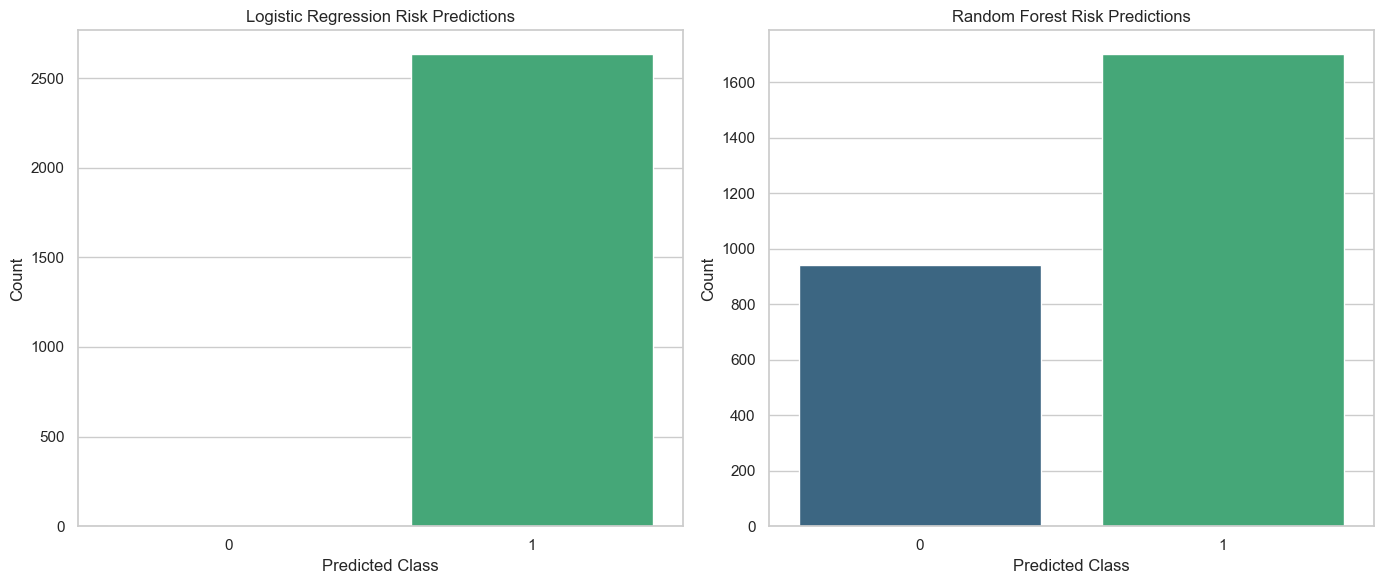

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Count the occurrences of each prediction
logreg_counts = df['logreg_predicted'].value_counts()
rf_counts = df['rf_predicted'].value_counts()

# Create a bar plot for logistic regression predictions
plt.figure(figsize=(14, 6))

# Subplot for Logistic Regression
plt.subplot(1, 2, 1)
sns.barplot(x=logreg_counts.index, y=logreg_counts.values, palette='viridis')
plt.title('Logistic Regression Risk Predictions')
plt.xlabel('Predicted Class')
plt.ylabel('Count')

# Subplot for Random Forest
plt.subplot(1, 2, 2)
sns.barplot(x=rf_counts.index, y=rf_counts.values, palette='viridis')
plt.title('Random Forest Risk Predictions')
plt.xlabel('Predicted Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [63]:
# Save the feature engineered dataset
df.to_csv('../data/Risk_Prob_data.csv', index=False)

In [82]:
import joblib
import pickle

# Define the directory for saving models
models_folder = '../Models'

# Create the folder if it doesn't exist
os.makedirs(models_folder, exist_ok=True)


# Assuming logreg_model and rf_model are your trained models
models = {
    'logistic_regression': logreg,
    'random_forest': rf
}

# Save the dictionary to a file in the Models folder
with open(os.path.join(models_folder, 'Credit_Trained_Model.pkl'), 'wb') as f:
    pickle.dump(models, f)



###  FICO Credit Score

In [83]:
def assign_credit_score_and_rating(row):
    # Compute the average risk probability
    avg_risk_probability = (row['logreg_risk_probability'] + row['rf_risk_probability']) / 2

    # Determine the credit score and category based on average risk probability
    if avg_risk_probability < 0.2:  # High creditworthiness
        return 800, 'Excellent'
    elif 0.2 <= avg_risk_probability < 0.4:  # Good creditworthiness
        return 740, 'Very Good'
    elif 0.4 <= avg_risk_probability < 0.6:  # Moderate creditworthiness
        return 670, 'Good'
    elif 0.6 <= avg_risk_probability < 0.8:  # Fair creditworthiness
        return 580, 'Fair'
    else:  # High risk
        return 300, 'Poor'

# Apply the function to assign scores and ratings
df[['Credit_Score', 'Rating']] = df.apply(assign_credit_score_and_rating, axis=1, result_type='expand')

# Display the updated DataFrame
print(df[['CustomerId', 'logreg_risk_probability', 'rf_risk_probability', 'Credit_Score', 'Rating']])


      CustomerId  logreg_risk_probability  rf_risk_probability  Credit_Score  \
0              0                 0.652131                 1.00           300   
1              1                 0.633545                 1.00           300   
2              2                 0.650782                 1.00           300   
3              3                 0.659047                 1.00           300   
4              4                 0.645696                 0.99           300   
...          ...                      ...                  ...           ...   
2636        2636                 0.617451                 1.00           300   
2637        2637                 0.620137                 1.00           300   
2638        2638                 0.656866                 1.00           300   
2639        2639                 0.634930                 0.00           740   
2640        2640                 0.662976                 0.00           740   

         Rating  
0          Poor  
1  

In [84]:
print(df)

      CustomerId  Recency  Frequency  Monetary   MeanAmount     StdAmount  \
0              0        0          5   20000.0  4000.000000   6558.963333   
1              1       63         11    4225.0   384.090909    560.498966   
2              2        0          6   20000.0  3333.333333   6030.478146   
3              3        0          9   48800.0  5422.222222   5983.681513   
4              4       12          7   26335.0  3762.142857   4971.798817   
...          ...      ...        ...       ...          ...           ...   
2636        2636        0          6   20000.0  3333.333333   6088.240030   
2637        2637        0          5   20000.0  4000.000000   6745.368782   
2638        2638       88        101  543873.0  5384.881188  14800.656784   
2639        2639        0         17  139000.0  8176.470588   4433.329648   
2640        2640       25         22  100000.0  4545.454545   6775.145563   

      AvgTransactionHour  AvgTransactionDay  AvgTransactionMonth  \
0      

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(['Credit_Score', 'Rating'], axis=1)  # Features (excluding target and rating)
y = df['Credit_Score']  # Target (credit score)

# Split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print(f"X_train2 shape: {X_train2.shape}")
print(f"X_test2 shape: {X_test2.shape}")
print(f"y_train2 shape: {y_train2.shape}")
print(f"y_test2 shape: {y_test2.shape}")


X_train2 shape: (2112, 41)
X_test2 shape: (529, 41)
y_train2 shape: (2112,)
y_test2 shape: (529,)


In [86]:
credit_score_model = LinearRegression()
credit_score_model.fit(X_train2, y_train2)

LinearRegression()

In [87]:
y_pred2 = credit_score_model.predict(X_test2)

In [88]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test2, y_pred2)
mse = mean_squared_error(y_test2, y_pred2)
rmse = mean_squared_error(y_test2, y_pred2, squared=False)
r2 = r2_score(y_test2, y_pred2)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Absolute Error: 20.80
Mean Squared Error: 1985.82
Root Mean Squared Error: 44.56
R-squared: 0.96


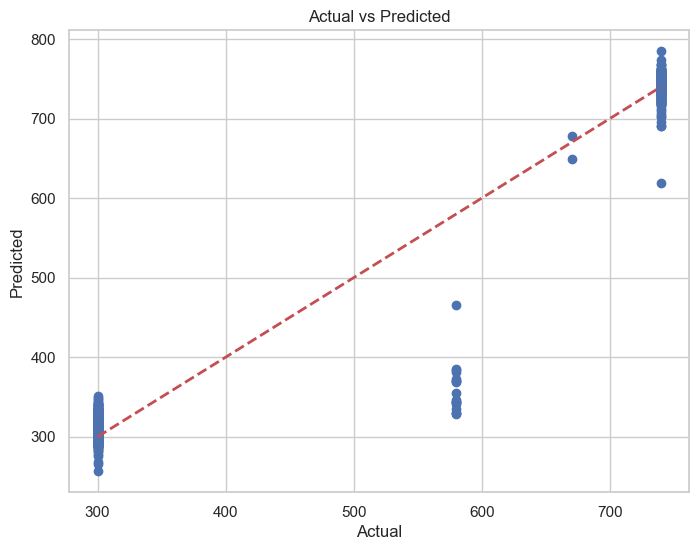

In [89]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test2, y_pred2)
plt.plot([y_test2.min(), y_test2.max()], [y_test2.min(), y_test2.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [90]:
import os
import joblib
import pickle

# Define the directory for saving models
models_folder = '../Models'

# Create the folder if it doesn't exist
os.makedirs(models_folder, exist_ok=True)

# Save the dictionary of models to a file in the Models folder using pickle
with open(os.path.join(models_folder, 'Credit_Scoring_Model.pkl'), 'wb') as f:
    pickle.dump(models, f)

print(f"Models saved successfully to {os.path.join(models_folder, 'Credit_Scoring_Model.pkl')}")


Models saved successfully to ../Models\Credit_Scoring_Model.pkl
